In [1]:
# !pip install opencv-python imgbeddings psycopg2-binary

Step 1: Face recognition
Detect the faces from the test-image picture and store them under the stored-faces folder

In [2]:
# importing the cv2 library
import cv2

# loading the haar case algorithm file into alg variable
alg = "/Users/fung8/Desktop/Tecky/selfStudy/Python/haarcascade_frontalface_default.xml"
# passing the algorithm to OpenCV
haar_cascade = cv2.CascadeClassifier(alg)
# loading the image path into file_name variable - replace <INSERT YOUR IMAGE NAME HERE> with the path to your image
file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/photos/blackpink.jpg"
# file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/photos/USA.jpg"
# file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/photos/collar.jpg"


# reading the image
img = cv2.imread(file_name, 0)
# creating a black and white version of the image
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# detecting the faces
faces = haar_cascade.detectMultiScale(
    gray_img, scaleFactor=1.05, minNeighbors=10, minSize=(100, 100)
)

i = 0
# for each face detected
for x, y, w, h in faces:
    # crop the image to select only the face
    cropped_image = img[y : y + h, x : x + w]
    # loading the target image path into target_file_name variable  - replace <INSERT YOUR TARGET IMAGE NAME HERE> with the path to your target image
    target_file_name = '/Users/fung8/Desktop/Tecky/selfStudy/Python/stored-faces/' + str(i) + '.jpg'
    cv2.imwrite(
        target_file_name,
        cropped_image,
    )
    i = i + 1;

Step 2: Embeddings Calculation
Calculate embeddings from the faces and pushing to PostgreSQL, you'll need to change the <SERVICE_URI> parameter with the PostgreSQL Service URI

In [3]:
# importing the required libraries
import numpy as np
from imgbeddings import imgbeddings
from PIL import Image
import psycopg2
import os

# connecting to the database - replace the SERVICE URI with the service URI
conn = psycopg2.connect(database="facialdetect",
                        host="localhost",
                        user="fung8",
                        password="postgres",
                        port="5432")

cur = conn.cursor()

# Drop the pictures table if it exists
cur.execute("DROP TABLE IF EXISTS pictures")

# Create a new pictures table
cur.execute("CREATE TABLE pictures (picture text primary key, embedding vector(768))")
# cur.execute("CREATE TABLE pictures (picture text, embedding vector(768))")


for filename in os.listdir("stored-faces"):
    if filename == ".DS_Store":
        continue
    # opening the image
    img = Image.open("stored-faces/" + filename)
    # loading the `imgbeddings`
    ibed = imgbeddings()
    # calculating the embeddings
    embedding = ibed.to_embeddings(img)
    cur.execute("INSERT INTO pictures values (%s,%s)", (filename, embedding[0].tolist()))
    print(filename)
conn.commit()


/Users/fung8/.pyenv/versions/3.9.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
/Users/fung8/.pyenv/versions/3.9.9/lib/python3.9/site-packages/huggingface_hub/file_download.py:671: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/Users/fung8/.pyenv/versions/3.9.9/lib/python3.9/site-packages/transformers/models/clip/processing_clip.py:149: FutureWarning: `feature_extractor` is deprecated an

4.jpg
5.jpg
7.jpg
6.jpg
2.jpg
3.jpg
1.jpg
0.jpg


Step 3: Calculate embeddings on a new picture
Find the face and calculate the embeddings on the picture solo-image.png used for research

In [4]:
# loading the face image path into file_name variable
# file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/soloface/Louis.jpg"  # replace <INSERT YOUR FACE FILE NAME> with the path to your image
# file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/soloface/Harry.jpg"  # replace <INSERT YOUR FACE FILE NAME> with the path to your image
# file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/soloface/trump.jpg"  # replace <INSERT YOUR FACE FILE NAME> with the path to your image

# file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/soloface/jisoo.jpg"  # Replace with your file path
file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/soloface/ivy.jpg"  # Replace with your file path

# file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/soloface/day.jpg"  # Replace with your file path

# file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/soloface/day2.png"  # Replace with your file path
# file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/soloface/cricket.png"  # Replace with your file path
# file_name = "/Users/fung8/Desktop/Tecky/selfStudy/Python/soloface/pig.png"  # Replace with your file path


# reading the image
input_img = cv2.imread(file_name, 0)
# creating a black and white version of the image
input_gray_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2BGR)
# detecting the faces
input_faces = haar_cascade.detectMultiScale(
    # input_gray_img, scaleFactor=1.05, minNeighbors=7, minSize=(100, 100)
     input_gray_img, scaleFactor=1.2, minNeighbors=4, minSize=(100, 100)
)
print(input_faces)



[[148 197 111 111]]


In [5]:
i = 0
embedding = ""
# print(input_gray_img)

# for each face detected
for x, y, w, h in input_faces:
    # crop the image to select only the face
    cropped_image = input_img[y : y + h, x : x + w]
    # loading the target image path into target_file_name variable  - replace <INSERT YOUR TARGET IMAGE NAME HERE> with the path to your target image
    target_file_name = '/Users/fung8/Desktop/Tecky/selfStudy/Python/test/' + str(i) + '.jpg'
    cv2.imwrite(
        target_file_name,
        cropped_image,
    )
    # display(i(filename=target_file_name))
    image = Image.open(target_file_name)
    ibed = imgbeddings()
    # calculating the embeddings
    embedding = ibed.to_embeddings(image)
    image.show()
    i = i + 1;

print(embedding)


[[-7.45499507e-02  1.25844151e-01  5.83533764e-01  1.79649368e-01
   4.25191104e-01 -7.10179567e-01 -1.96512803e-01  9.47283268e-01
   9.75510180e-01  3.30182850e-01  4.77780432e-01 -5.61256409e-01
  -3.23866308e-01  2.27829784e-01  1.25537086e+00  1.84880602e+00
   1.32742834e+00  1.27596569e+00 -1.87508658e-01  8.66514444e-02
   7.95119584e-01 -6.44309968e-02 -1.04528677e+00  6.29204392e-01
   6.27717227e-02 -9.75410864e-02  2.48510033e-01  6.24512076e-01
  -1.52825013e-01 -1.76034957e-01  8.28601122e-01 -6.15252376e-01
  -1.41502842e-01  4.50521737e-01  4.88331795e-01  1.79877028e-01
  -8.02389830e-02  7.71187425e-01 -3.49381804e-01 -4.06104684e-01
   8.81826162e-01  1.52894892e-02 -2.69193321e-01 -7.22881079e-01
  -6.40216619e-02  9.17461455e-01  9.07978229e-03  4.78970945e-01
   2.55683810e-01  3.14831078e-01 -1.07121658e+00  6.15451574e-01
  -7.64306426e-01  3.54451776e-01  2.31669322e-01  2.90674686e-01
  -5.49100697e-01 -1.40709862e-01 -1.97862819e-01 -8.44601691e-01
  -3.84328

Step 3: Find similar images by querying the Postgresql database using pgvector

(768,)
Similarity: 0.873114163282724
index:  0
Similarity: 0.8961158161080622
index:  1
Similarity: 0.8702840823654052
index:  2
Similarity: 0.9170273048170442
index:  3
Similarity: 0.8863952966130223
index:  4
Similarity: 0.856929755867354
index:  5
Similarity: 0.8388149360837467
index:  6
Similarity: 0.8539978619057683
index:  7
score:  0.9170273048170442
target_index:  3


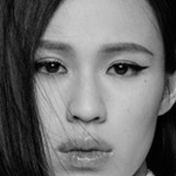

In [6]:
from IPython.display import Image as i, display
from scipy.spatial.distance import cosine

cur = conn.cursor()
cur.execute("SELECT * FROM pictures;")
rows = cur.fetchall()
input_array = embedding[0]


print(input_array.shape)
score = 0
target_index = ""
final_match = ""
for index, row in enumerate(rows):
    name = row[0]
    array = row[1]
    database_array = np.array(eval(array))
    print("Similarity:", array)

    # display(i(filename="/Users/fung8/Desktop/Tecky/selfStudy/Python/stored-faces/"+name))
    # Calculate the cosine similarity between the embeddings
    similarity = 1 - cosine(input_array, database_array)
    if score < similarity:
        score = similarity
        target_index = index
        final_match = name
    # Print the similarity score
    # print("Similarity:", similarity)
    # print("index: ", index)
print("score: ", score)
print("target_index: ", target_index)
display(i(filename="/Users/fung8/Desktop/Tecky/selfStudy/Python/stored-faces/"+final_match))
cur.close()